In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [ ]:
#from google.colab import drive
#drive._mount('/content/drive')

path = "https://raw.githubusercontent.com/zizhaoguan/cs122_covid19_data/main/data_2/corona_tested_individuals_ver_006.english.csv"
new_df = pd.read_csv(path)
new_df["corona_result"].unique()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
true_list = ["positive"]
false_list = ["negative"]
new_df = pd.read_csv(
               path,
               na_values=["None", "other"],
               true_values = true_list,
               false_values = false_list
               ).dropna()


change_col_list = ["age_60_and_above"]

def change_value(row):
  for col in change_col_list:
    if row[col] == "Yes":
      row[col] = 1
    elif row[col] == "No":
      row[col] = 0
  return row

'''
for col in change_col_list:
  new_df[col] = new_df[col].astype('int')
'''
new_df["corona_result"] = new_df["corona_result"].astype('bool')


new_df = new_df.drop(["test_date", "test_indication", "gender"]
                     ,axis="columns")

new_df= new_df.apply(change_value, axis="columns")

new_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above
122808,1.0,0.0,0.0,0.0,0.0,False,1
122809,1.0,0.0,0.0,0.0,0.0,True,0
122810,0.0,0.0,0.0,0.0,0.0,False,0
122811,0.0,1.0,0.0,0.0,0.0,False,0
122812,1.0,0.0,0.0,0.0,0.0,False,1
...,...,...,...,...,...,...,...
265116,1.0,1.0,0.0,0.0,0.0,False,1
265117,1.0,1.0,1.0,0.0,1.0,False,0
265118,1.0,0.0,0.0,0.0,0.0,False,0
265119,1.0,0.0,0.0,0.0,0.0,False,0


In [ ]:
new_df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above
122808,1.0,0.0,0.0,0.0,0.0,False,1
122809,1.0,0.0,0.0,0.0,0.0,True,0
122810,0.0,0.0,0.0,0.0,0.0,False,0
122811,0.0,1.0,0.0,0.0,0.0,False,0
122812,1.0,0.0,0.0,0.0,0.0,False,1
...,...,...,...,...,...,...,...
265116,1.0,1.0,0.0,0.0,0.0,False,1
265117,1.0,1.0,1.0,0.0,1.0,False,0
265118,1.0,0.0,0.0,0.0,0.0,False,0
265119,1.0,0.0,0.0,0.0,0.0,False,0


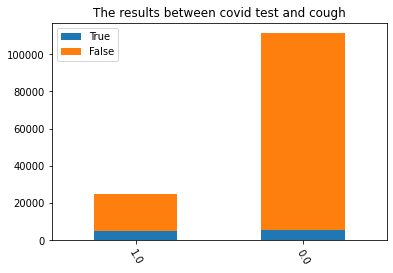

In [ ]:
from collections import defaultdict
from matplotlib import pyplot as plt


covid_results = [True, False]
test_result_list = [1.0, 0.0]

cough_results_dict = defaultdict(list)

for sym_test in test_result_list:
  for result in covid_results:
    cough_results_dict[result].append(new_df[
                      (new_df["corona_result"] == result) &
                       (new_df["cough"] == sym_test)
                      ]["cough"].size)
  
cough_df = pd.DataFrame(cough_results_dict, index = test_result_list)
ax = cough_df.plot.bar(stacked=True, rot=300)
plt.title("The results between covid test and cough");

In [ ]:
cough_df

,True,False
1.0,5077,19774
0.0,5549,105894


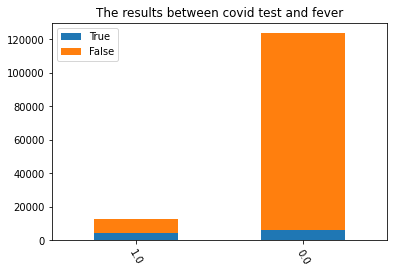

In [ ]:
covid_results = [True, False]
test_result_list = [1.0, 0.0]

fever_results_dict = defaultdict(list)

for sym_test in test_result_list:
  for result in covid_results:
    fever_results_dict[result].append(new_df[
                      (new_df["corona_result"] == result) &
                       (new_df["fever"] == sym_test)
                      ]["fever"].size)
  
fever_df = pd.DataFrame(fever_results_dict, index = test_result_list)
ax = fever_df.plot.bar(stacked=True, rot=300)
plt.title("The results between covid test and fever");

In [ ]:
fever_df

,True,False
1.0,4449,8212
0.0,6177,117456


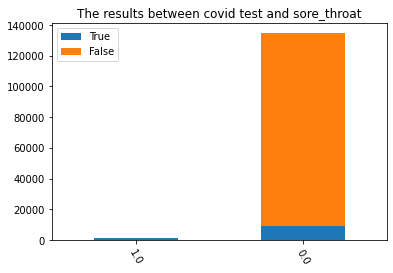

In [ ]:
covid_results = [True, False]
test_result_list = [1.0, 0.0]

sore_throat_results_dict = defaultdict(list)

for sym_test in test_result_list:
  for result in covid_results:
    sore_throat_results_dict[result].append(new_df[
                      (new_df["corona_result"] == result) &
                       (new_df["sore_throat"] == sym_test)
                      ]["sore_throat"].size)
  
sore_throat_df = pd.DataFrame(sore_throat_results_dict, index = test_result_list)
ax = sore_throat_df.plot.bar(stacked=True, rot=300)
plt.title("The results between covid test and sore_throat");

In [ ]:
sore_throat_df

,True,False
1.0,1356,117
0.0,9270,125551


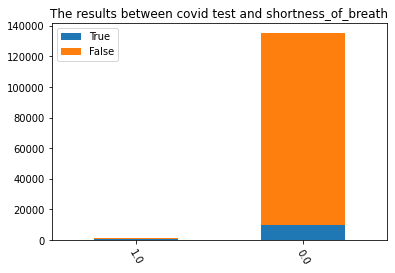

In [ ]:
covid_results = [True, False]
test_result_list = [1.0, 0.0]

shortness_of_breath_results_dict = defaultdict(list)

for sym_test in test_result_list:
  for result in covid_results:
    shortness_of_breath_results_dict[result].append(new_df[
                      (new_df["corona_result"] == result) &
                       (new_df["shortness_of_breath"] == sym_test)
                      ]["shortness_of_breath"].size)
  
shortness_of_breath_df = pd.DataFrame(shortness_of_breath_results_dict, index = test_result_list)
ax = shortness_of_breath_df.plot.bar(stacked=True, rot=300)
plt.title("The results between covid test and shortness_of_breath");

In [ ]:
shortness_of_breath_df

,True,False
1.0,975,86
0.0,9651,125582


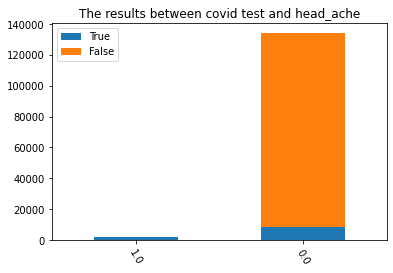

In [ ]:
covid_results = [True, False]
test_result_list = [1.0, 0.0]
head_ache_results_dict = defaultdict(list)

for sym_test in test_result_list:
  for result in covid_results:
    head_ache_results_dict[result].append(new_df[
                      (new_df["corona_result"] == result) &
                       (new_df["head_ache"] == sym_test)
                      ]["head_ache"].size)
  
head_ache_df = pd.DataFrame(head_ache_results_dict, index = test_result_list)
ax = head_ache_df.plot.bar(stacked=True, rot=300)
plt.title("The results between covid test and head_ache");

In [ ]:
head_ache_df

,True,False
1.0,1994,81
0.0,8632,125587


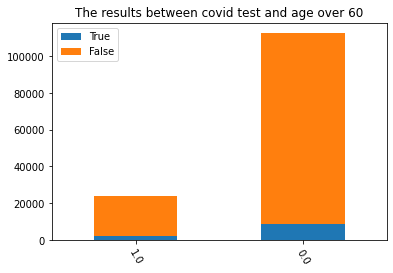

In [ ]:
covid_results = [True, False]
test_result_list = [1.0, 0.0]

age_results_dict = defaultdict(list)

for sym_test in test_result_list:
  for result in covid_results:
    age_results_dict[result].append(new_df[
                      (new_df["corona_result"] == result) &
                       (new_df["age_60_and_above"] == sym_test)
                      ]["age_60_and_above"].size)
  
age_df = pd.DataFrame(age_results_dict, index = test_result_list)
ax = age_df.plot.bar(stacked=True, rot=300)
plt.title("The results between covid test and age over 60");

In [ ]:
age_df

,True,False
1.0,2053,21648
0.0,8573,104020
